In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# --- Setup ---
FILE_PATH = "heart_failure_clinical_records_dataset.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.2

# 1. Load the dataset
df = pd.read_csv(FILE_PATH)

# 2. Define Features (X) and Target (y)
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Training
model = RandomForestClassifier(random_state=RANDOM_STATE)
model.fit(X_train_scaled, y_train)

# 6. Predictions
y_pred = model.predict(X_test_scaled)

# 7. Construct the output DataFrame
# Combine test features, actual, and predicted integer outcomes
X_test_indexed = X_test.copy()
X_test_indexed['Actual_DEATH_EVENT'] = y_test
X_test_indexed['Predicted_DEATH_EVENT'] = y_pred

# 8. Add human-readable labels
outcome_map = {0: 'Survival', 1: 'Death'}
X_test_indexed['Actual_Outcome'] = X_test_indexed['Actual_DEATH_EVENT'].map(outcome_map)
X_test_indexed['Predicted_Outcome'] = X_test_indexed['Predicted_DEATH_EVENT'].map(outcome_map)

# Save the resulting DataFrame
output_file = "model_predictions_with_labels.csv"
X_test_indexed.to_csv(output_file, index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define constants
FILE_PATH = "heart_failure_clinical_records_dataset.csv"
RANDOM_STATE = 42
MODEL_FILENAME = "final_rf_model.joblib"
SCALER_FILENAME = "final_scaler.joblib"

# 1. Load the entire dataset
df = pd.read_csv(FILE_PATH)

# 2. Define Features (X) and Target (y)
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# 3. Feature Scaling on the entire dataset
# The scaler must be fitted on all training data (in this case, the entire dataset)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train the Final Model on ALL data
model = RandomForestClassifier(random_state=RANDOM_STATE)
model.fit(X_scaled, y)

# 5. "Deploy" Step: Save the trained model and scaler
# This allows the model to be loaded and used later without retraining.
joblib.dump(model, MODEL_FILENAME)
joblib.dump(scaler, SCALER_FILENAME)

print(f"Final Random Forest Model trained on ALL data and saved as: {MODEL_FILENAME}")
print(f"Fitted StandardScaler saved as: {SCALER_FILENAME}")

# --- End of Deployment Preparation Code ---

Final Random Forest Model trained on ALL data and saved as: final_rf_model.joblib
Fitted StandardScaler saved as: final_scaler.joblib


In [ ]:
import pandas as pd

df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
display(df.head())

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
import pandas as pd  # for handling data
import numpy as np   # for calculations
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv") # or the filename you uploaded
print(df.head())  # show first 5 rows


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
             

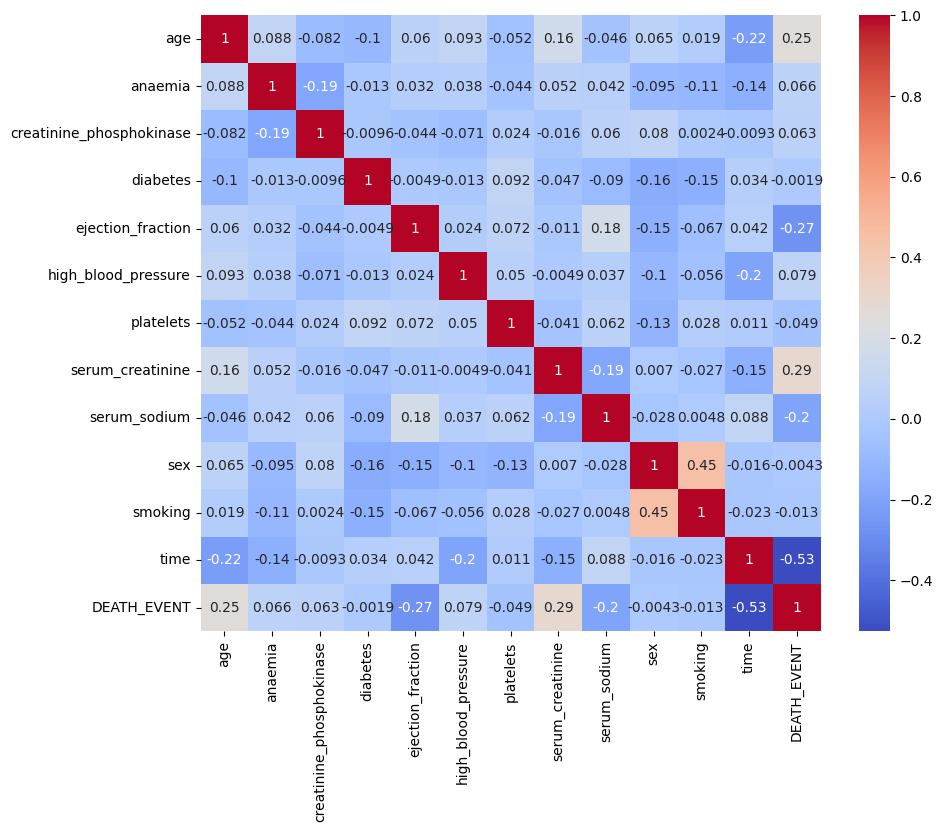

In [ ]:
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Visualize correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



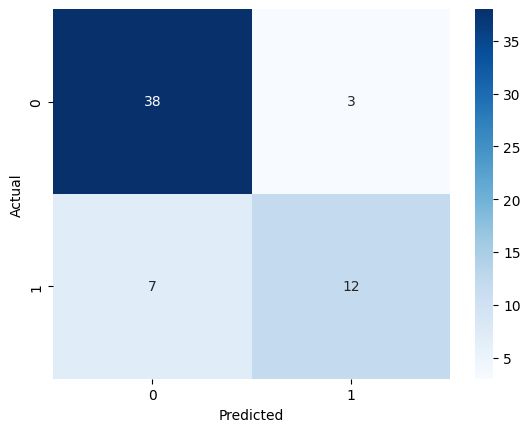

In [ ]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Split features and target
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save model and scaler
joblib.dump(model, "heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")


Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60

✅ Model and scaler saved successfully!


In [ ]:
import joblib
import numpy as np
import pandas as pd

# Load model and scaler
model = joblib.load("heart_model.pkl")
scaler = joblib.load("scaler.pkl")

# Column names (must match training data)
columns = [
    "age", "anaemia", "creatinine_phosphokinase", "diabetes",
    "ejection_fraction", "high_blood_pressure", "platelets",
    "serum_creatinine", "serum_sodium", "sex", "smoking", "time"
]

# Model accuracy
MODEL_ACCURACY = 0.85  # 85%

# Define which features are binary
binary_features = {
    "anaemia": "Anaemia (0=No, 1=Yes)",
    "diabetes": "Diabetes (0=No, 1=Yes)",
    "high_blood_pressure": "High Blood Pressure (0=No, 1=Yes)",
    "sex": "Sex (0=Female, 1=Male)",
    "smoking": "Smoking (0=No, 1=Yes)"
}

# Define numeric features
numeric_features = [
    "Age",
    "Creatinine Phosphokinase (U/L)",
    "Ejection Fraction (%)",
    "Platelets (/μL)",
    "Serum Creatinine (mg/dL)",
    "Serum Sodium (mmol/L)",
    "Follow-up Time (days)"
]

def predict_heart_failure(input_data):
    # Convert input to DataFrame
    df_input = pd.DataFrame([input_data], columns=columns)
    input_scaled = scaler.transform(df_input)

    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    result = "Survived" if prediction == 0 else "Death"
    return result, probability

def main():
    print("💓 Heart Failure Prediction 💓")
    print(f"📊 Model Accuracy on Test Set: {MODEL_ACCURACY*100:.2f}%\n")

    input_data = []

    # Collect numeric features
    for feature in numeric_features:
        while True:
            try:
                value = float(input(f"Enter {feature}: "))
                input_data.append(value)
                break
            except ValueError:
                print("❌ Please enter a valid number.")

    # Collect binary features (must be 0 or 1)
    for key, feature in binary_features.items():
        while True:
            try:
                value = int(input(f"Enter {feature}: "))
                if value not in [0, 1]:
                    print("❌ Please enter only 0 or 1.")
                    continue
                input_data.insert(columns.index(key), value)  # Insert at correct position
                break
            except ValueError:
                print("❌ Please enter a valid number (0 or 1).")

    # Rearrange in correct column order
    df_data = [input_data[columns.index(col)] for col in columns]

    result, probability = predict_heart_failure(df_data)

    print("\n### Prediction Result ###")
    print(f"⚡ Outcome: {result}")
    print(f"⚡ Probability of Death: {probability:.2f}")
    print(f"⚡ Keep in mind: The model accuracy is ~{MODEL_ACCURACY*100:.2f}%")

if __name__ == "__main__":
    main()


💓 Heart Failure Prediction 💓
📊 Model Accuracy on Test Set: 85.00%

Enter Age: 70
Enter Creatinine Phosphokinase (U/L): 890
Enter Ejection Fraction (%): 9087
Enter Platelets (/μL): 787878
Enter Serum Creatinine (mg/dL): 888680
Enter Serum Sodium (mmol/L): 87878
Enter Follow-up Time (days): 970987
Enter Anaemia (0=No, 1=Yes): 8778987987
❌ Please enter only 0 or 1.
Enter Anaemia (0=No, 1=Yes): 0
Enter Diabetes (0=No, 1=Yes): 877
❌ Please enter only 0 or 1.
Enter Diabetes (0=No, 1=Yes): 1
Enter High Blood Pressure (0=No, 1=Yes): 0
Enter Sex (0=Female, 1=Male): 1
Enter Smoking (0=No, 1=Yes): 0

### Prediction Result ###
⚡ Outcome: Survived
⚡ Probability of Death: 0.49
⚡ Keep in mind: The model accuracy is ~85.00%
